# SCS2013 Exercise 11 

**This exercise notebook will go through the understanding of "Class Inheritance" in Python:**

- Class Inheritance (클래스 상속)
- Method Overriding (오버라이딩)

## Inheritance (상속)

The Object-Oriented Programming (OOP) is based on the concept of *class* (클래스) and *object* (객체), which can contain data and code: data in the form of instance variables (or known as attributes or properties), and code in the form of methods. 

**Inheritance** is the process of creating a new class from an existing class 

* parent (부모) (aka base, super) class
  * 멤버를 물려주는 클래스

* chile (자식) (aka derived, sub) class 
  * 멤버를 물려받는 클래스
  * 클래스를 정의할 때 소괄호로 상위클래스를 명시

* **Syntax**:
  ```
  class <ParentClass>:
    <Body of parent class>

  class <ChildClass>(<ParentClass>):
    <body of child class>
  ```

**Example of parent class**: 
Implement a parent class `Employee` that handles the common information for every employee type:

- Instance variables
  - `id`: identity number of an employee
  - `name`: name of an employee

- Instance methods
  - `print_info()`: prints out employee ID and name

`Employee` is the parent class for all employee types. 

In [ ]:
class Employee:
  # constructor
  def __init__(self, id, name):
    self.id = id
    self.name = name
  
  def print_info(self):
    print(f'Employee: ID: {self.id}, NAME: {self.name}')

**Example of child classes**: Now, create two child classes `SalaryEmployee` and `HourlyEmployee`. Both classes inherit the attributes and methods from the `Employee` class. 

1. `SalaryEmployee` class:
* Instance variables
  - add constructor to add its own instance variables `salary`
  - otherwise, it inherits `Employee`'s constructor

* Instance methods
  - `cal_payroll()`: return the employee's monthly pay (`salary` divided by 12 months)

2. `HourlyEmployee` class:
* Instance variables
  - add constructor to add its own instance variables `work_hours` and `hour_rate` (per week)
  - otherwise, it inherits `Employee`'s constructor

* Instance methods
  - `cal_payroll()`: return the employee's monthly pay ($4 \times$ `work_hours` $\times$ `hour_rate`)



In [ ]:
class SalaryEmployee(Employee):
  # constructor
  def __init__(self, id, name, salary):
    super().__init__(id, name)
    self.salary = salary

  def cal_payroll(self):
    return round(self.salary / 12, 2)

In [ ]:
class HourlyEmployee(Employee):
  # constructor
  def __init__(self, id, name, work_hours, hour_rate):
    super().__init__(id, name)
    self.work_hours = work_hours
    self.hour_rate = hour_rate

  def cal_payroll(self):
    return self.work_hours * self.hour_rate * 4

In [ ]:
# objects 
E1 = Employee(1, 'Peter')
SE1 = SalaryEmployee(2, 'James', 2000)
SE2 = SalaryEmployee(3, 'Alice', 2400)
HE1 = HourlyEmployee(4, 'Emma', 20, 3)

for employee in [E1, SE1, SE2, HE1]:
  print('=====')
  employee.print_info()  

## Method Overriding

What if we add a method in the child class with the *same* name as a function in the parent class?
The method in the child class **overrides** that in the parent class
- 부모 클래스에서 정의된 method를 자식 클래스에서 재정의 하는 것. 우선순위는 자식 클래스에 있음

- For example, `__init__()` was defined in both classes, `Employee` and `SalaryEmployee`
- `__init__()` in `SalaryEmployee` gets preference over the `__init__()` in `Employee`

- **super()** makes the child class invoke the parent's method

**Example of overriding**: Now, define `print_info()` in `SalaryEmployee` and `HourlyEmployee` which will print out the basic information of the employee (USE the `Employee`'s `print_info()` method) and additionally print out the salary, or work hours and hour rate


In [ ]:
class SalaryEmployee(Employee):
  # constructor
  def __init__(self, id, name, salary):
    super().__init__(id, name)
    self.salary = salary

  def cal_payroll(self):
    return round(self.salary / 12, 2)

  # overriding
  def print_info(self):
    super().print_info()
    # Employee.print_info(self)
    print(f'Per year Salary: {self.salary}')

In [ ]:
class HourlyEmployee(Employee):
  # constructor
  def __init__(self, id, name, work_hours, hour_rate):
    super().__init__(id, name)
    self.work_hours = work_hours
    self.hour_rate = hour_rate

  def cal_payroll(self):
    return self.work_hours * self.hour_rate * 4

  # overriding
  def print_info(self):
    super().print_info()
    print(f'Per week: Work hours: {self.work_hours} and Hour rate: {self.hour_rate}')

In [ ]:
# objects 
E1 = Employee(1, 'Peter')
SE1 = SalaryEmployee(2, 'James', 2000)
SE2 = SalaryEmployee(3, 'Alice', 2400)
HE1 = HourlyEmployee(4, 'Emma', 20, 3)

for employee in [E1, SE1, SE2, HE1]:
  print('=====')
  employee.print_info()  

**Another child class**: Now, create another child class `IncentiveEmployee` that inherits from the `SalaryEmployee` class.

`IncentiveEmployee` class:
* Instance variables
  - add constructor to add its own instance variables `incentive`
  - otherwise, it inherits `SalaryEmployee`'s constructor

* Instance methods
  - `cal_payroll()`: return the employee's monthly pay (total year salary is increased by `incentive`)

In [ ]:
class IncentiveEmployee(SalaryEmployee):
  # constructor
  def __init__(self, id, name, salary, incentive):
    super().__init__(id, name, salary)
    self.incentive = incentive

  def cal_payroll(self):
    return super().cal_payroll() + round(self.incentive/12, 2)

  def print_info(self):
    super().print_info()
    print(f'Per year Incentive: {self.incentive}')

In [ ]:
# objects 
E1 = Employee(1, 'Peter')
SE1 = SalaryEmployee(2, 'James', 2000)
SE2 = SalaryEmployee(3, 'Alice', 2400)
HE1 = HourlyEmployee(4, 'Emma', 20, 3)
IE1 = IncentiveEmployee(5, 'Tyler', 3300, 300)

for employee in [E1, SE1, SE2, HE1, IE1]:
  print('=====')
  employee.print_info()  

Create a class `PayrollSystem` that handles payroll of all employees:

- no constructor required at this time
- Instance methods
  - `cal_payroll()`: takes a list of employees as argument, and print out i) information of each employee (by using `print_info()`) and ii) payroll amount (by using `cal_payroll()`) 

In [ ]:
class PayrollSystem:
  def cal_payroll(self, employees):
    print('===============')
    print('Payroll System')
    print('===============')
    for employee in employees:
      employee.print_info()
      print(f'Monthly payroll amount: {employee.cal_payroll()}')
      print('***************')

Now, make a number of employee objects and manage payroll system!

In [ ]:
SE1 = SalaryEmployee(2, 'James', 2000)
SE2 = SalaryEmployee(3, 'Alice', 2400)
HE1 = HourlyEmployee(4, 'Emma', 20, 3)
IE1 = IncentiveEmployee(5, 'Tyler', 3300, 300)

payroll_system = PayrollSystem()
payroll_system.cal_payroll([SE1, SE2, HE1, IE1])

## Various Types of Inheritance & Special Methods

**Multiple Inheritance**

Python supports *multiple inheritance* that is an ability to derive a class from multiple parent classes at the same time. 

```
class <Parent1>:
  <body of Parent1 class>

class <Parent2>:
  <body of Parent2 class>

class <Child>(<Parent1>, <Parent2>):
  <body of Child class>
```

In [ ]:
class Person:
  def __init__(self, name=''):
    self.name = name

  def print_name(self):
    print(f'Personal info: name is {self.name}')

class Worker:
  def __init__(self, title, company):
    self.title = title
    self.company = company

  def print_work(self):
    print(f'Working info: {self.title} at {self.company}')

class Employee(Person, Worker):
  def __init__(self, name, title, company, pay):
    self.pay = pay
    Person.__init__(self, name)
    Worker.__init__(self, title, company)

  def print_info(self):
    super().print_name()
    super().print_work()
    print(f'Employee info: pay {self.pay}')

In [ ]:
E1 = Employee('Peter', 'student', 'DGU', 100)
E1.print_info()

In [ ]:
E1.__dict__

**Special Methods** are used to implement certain features or behaviors
* e.g., `__init__()`, `__str__()`, `__len__()`, `__add__()`

In [ ]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def __str__(self):
    return f'Name: {self.name}, Age: {self.age}'

  def __len__(self):
    return len(self.name) + self.age

  def __gt__(self, other):
    if isinstance(other, Person):
      return self.age > other.age

In [ ]:
p1 = Person('Peter', 14)
p2 = Person('Christina', 42)

for pp in [p1, p2]:
  print(pp)
  print(f'Length is {len(pp)}')
  print('=====')

print(f'p1 is greater than p2? {p1 > p2}')

## Exercise for Inheritance


### E-1

Create a `Vehicle` class with 

* instance variables
  - `name`, `max_speed` and `mileage`

* instance methods
  - `print_vehicle()`: prints out its `name`, `max_speed` and `mileage` information
  - `charge()`: return a mileage charge, which is set to **mileage $\times$ 10**. 

Expected result
```
v1 = Vehicle('Volvo', 150, 1000)
v1.print_vehicle()
print(f'{v1.name} charge is {v1.charge()}')
>> 
Name: Volvo, Max-speed: 150 and Mileage: 1000
Volvo charge is 10000
```

In [ ]:
# Vehicle class
# your code here:




In [ ]:
# test your code:
v1 = Vehicle('Volvo', 150, 1000)
v1.print_vehicle()
print(f'{v1.name} charge is {v1.charge()}')

### E-2

Create a child class called `Bus` that will inherit all of the attributes and methods of the `Vehicle` class. It has additional variables and methods:

- instance variables
  - additional instance variable is `seat_capacity` (좌석수)
  - otherwise, it inherits `Vehicle`'s constructor

- instance methods
  - `print_vehicle()`: it additionally prints out its `seat_capacity` information
  - `charge()`: it needs an extra charge for maintenance that is **seat capacity $\times$ 5**. Therefore, total charge for a bus is **final amount = mileage charge + maintenance charge**. You need to override the `charge()` method of a `Vehicle` class in `Bus` class.

Expected result 
```
b1 = Bus('SchoolBus', 120, 500, 50)
b1.print_vehicle()
print(f'{b1.name} charge is {b1.charge()}')
>>
Name: SchoolBus, Max-speed: 120 and Mileage: 500
The seating capacity of SchoolBus is 50 passengers
SchoolBus charge is 5250
```

In [ ]:
# Bus class
# your code here:




In [ ]:
# test your code:
b1 = Bus('SchoolBus', 120, 500, 50)
b1.print_vehicle()
print(f'{b1.name} charge is {b1.charge()}')

In [ ]:
# check your instances! 
print(type(v1))
print(type(b1))

print(f'v1 is instance of Vehicle? {isinstance(v1, Vehicle)}')
print(f'b1 is instance of Vehicle? {isinstance(b1, Vehicle)}')
print(f'v1 is instance of Bus? {isinstance(v1, Bus)}')
print(f'b1 is instance of Bus? {isinstance(b1, Bus)}')

print(f'Vehicle is a subclass of Bus? {issubclass(Vehicle, Bus)}')
print(f'Bus is a subclass of Vehicle? {issubclass(Bus, Vehicle)}')

### E-3

Create a class named `Triangle` (삼각형)
- instance variables: two values `base`(밑변) and `height`(높이)
- instance method: `area()` that computes the area of a triangle: **triangle area = 0.5 $\times$ base $\times$ height**

Create a class named `Rectangle` (직사각형)

- instance variables: two values `length`(가로) and `width`(세로)
- instance method: `area()` that computes the area of a rectangle: **rectangle area = length $\times$ width**

Expected result
```
T1 = Triangle(5, 20)
print(f'Triangle: base {T1.base}, height {T1.height}: area {T1.area()}')

R1 = Rectangle(5, 20)
print(f'Rectangle: length {R1.length}, width {R1.width}: area {R1.area()}')
>>
Triangle: base 5, height 20: area 50.0
Rectangle: length 5, width 20: area 100
```

In [ ]:
# your code here:
# Triangle class



# Rectangle class




In [ ]:
# test your code:
T1 = Triangle(5, 20)
print(f'Triangle: base {T1.base}, height {T1.height}: area {T1.area()}')

R1 = Rectangle(5, 20)
print(f'Rectangle: length {R1.length}, width {R1.width}: area {R1.area()}')

### E-4

Create a child class named `Square` (정사각형)
- instance variables: it has only a **single** side length `side`
- note that a square is a special type of a rectangle - one whose length and width are equal as `side`
- `Square` will inherit all of the attributes of `Rectangle`

Expected result
```
S1 = Square(5)
print(f'Square: side {S1.side}: area {S1.area()}')
>>
Square: side 5: area 25
```


In [ ]:
# your code here:
# Square class




In [ ]:
# test your code:
S1 = Square(5)
print(f'Square: side {S1.side}: area {S1.area()}')

### E-5

Create a child class named `Pyramid` (피라미드)
- instance variables: a `base` (아래면의 밑변) and `slant_height` (옆면의 높이)
- a Pyramid is a combination of **one square** and **four triangles**
- `Pyramid` inherits all of the attributes of `Square` and `Triangle`
- Total surface area is **pyramid area = square area (base) + 4 $\times$ triangle area**

Expected result
```
P1 = Pyramid(5, 20)
print(f'Pyramid: base {P1.base}, slant height {P1.slant_height}: area {P1.area()}')
>>
Pyramid: base 5, slant height 20: area 225.0
```

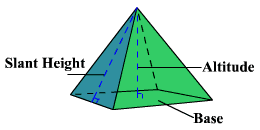

In [ ]:
# your code here:
# Pyramid class




In [ ]:
# test your code:
P1 = Pyramid(5, 20)
print(f'Pyramid: base {P1.base}, slant height {P1.slant_height}: area {P1.area()}')